Primeiras linhas do dataset:
   Product_Category  Store_ID  Stock_Available  Marketing_Spend  Holiday_Week  \
0                 2         3               15      8907.669877             0   
1                 0         1               81      8176.834194             1   
2                 2         8               32      6926.066512             0   
3                 2         5               56      8655.235562             0   
4                 0         4               99      8805.647809             1   

   Demand  
0     177  
1      95  
2     115  
3     161  
4      62  

Resumo estatístico:
       Product_Category    Store_ID  Stock_Available  Marketing_Spend  \
count        500.000000  500.000000       500.000000       500.000000   
mean           0.994000    4.858000        54.472000      5556.840412   
std            0.816883    2.582862        25.977276      2616.712910   
min            0.000000    1.000000        10.000000      1044.459828   
25%            0.000000   

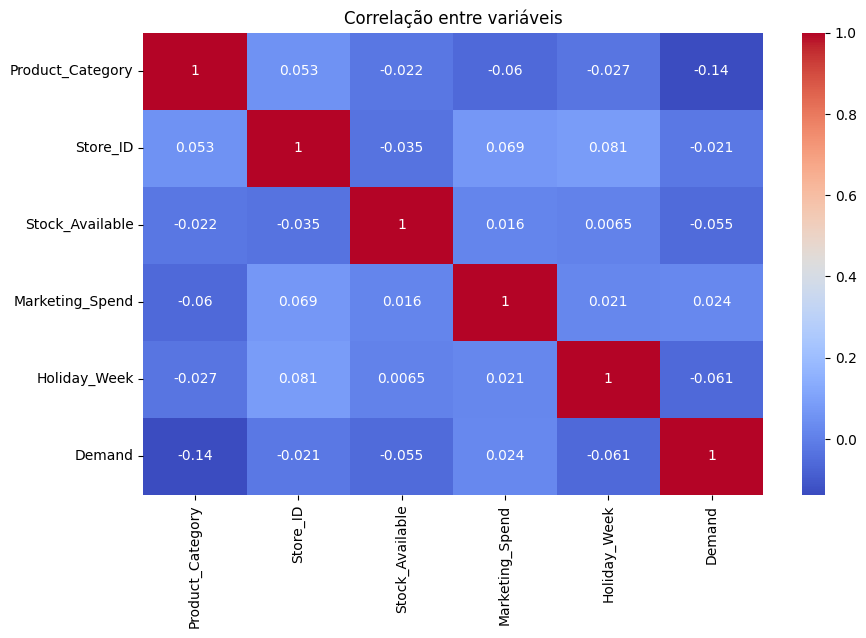


Avaliação dos Modelos:
Regressão Linear - RMSE: 40.86 | R²: -0.011
Random Forest - RMSE: 44.05 | R²: -0.175


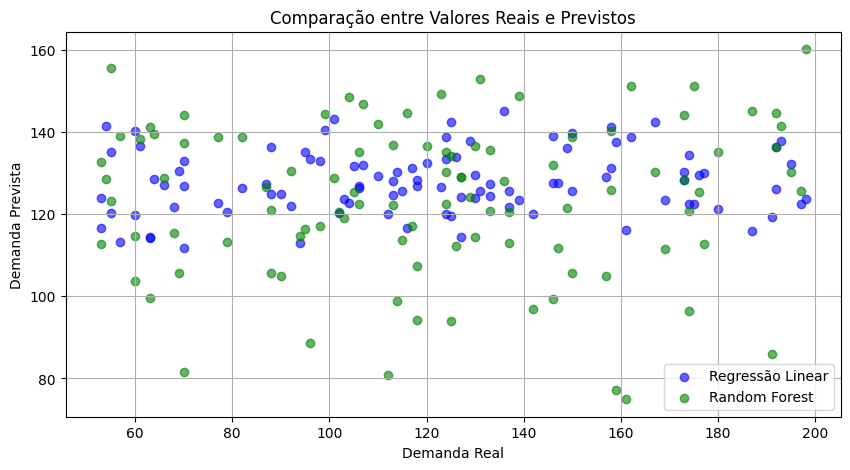

In [1]:
# Projeto de Previsão de Demanda de Produtos
# Autor: Pedro Henrique Resende Alves
# RA: 5123177
# Data: Junho de 2025

# 1. Bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings("ignore")

# 2. Simulação de Dataset
np.random.seed(42)
n = 500

df = pd.DataFrame({
    "Product_Category": np.random.choice(['A', 'B', 'C'], size=n),
    "Store_ID": np.random.randint(1, 10, size=n),
    "Stock_Available": np.random.randint(10, 100, size=n),
    "Marketing_Spend": np.random.uniform(1000, 10000, size=n),
    "Holiday_Week": np.random.choice([0, 1], size=n),
    "Demand": np.random.randint(50, 200, size=n)
})

# 3. Pré-processamento
label = LabelEncoder()
df['Product_Category'] = label.fit_transform(df['Product_Category'])

# 4. Análise Exploratória
print("Primeiras linhas do dataset:")
print(df.head())

print("\nResumo estatístico:")
print(df.describe())

plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlação entre variáveis")
plt.show()

# 5. Separação dos dados
X = df.drop('Demand', axis=1)
y = df['Demand']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. Modelos

# Regressão Linear
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

# Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

# 7. Avaliação
def avaliar_modelo(nome, y_test, y_pred):
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    print(f"{nome} - RMSE: {rmse:.2f} | R²: {r2:.3f}")
    return rmse, r2

print("\nAvaliação dos Modelos:")
lr_rmse, lr_r2 = avaliar_modelo("Regressão Linear", y_test, lr_pred)
rf_rmse, rf_r2 = avaliar_modelo("Random Forest", y_test, rf_pred)

# 8. Visualização Real vs. Previsto
plt.figure(figsize=(10,5))
plt.scatter(y_test, lr_pred, color='blue', label='Regressão Linear', alpha=0.6)
plt.scatter(y_test, rf_pred, color='green', label='Random Forest', alpha=0.6)
plt.xlabel('Demanda Real')
plt.ylabel('Demanda Prevista')
plt.title('Comparação entre Valores Reais e Previstos')
plt.legend()
plt.grid(True)
plt.show()
